In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm #回帰分析
import seaborn as sns#散布図に回帰直性ひく
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
chinai_data = pd.read_excel("知内川13年.xlsx")
print(chinai_data)

           採水日  クロロフィル    気温    水温   透明度    DO  COD     TP    TN   pH
0   2007-01-09     1.5   8.8   9.4   8.8  10.0  2.2  0.005  0.32  7.4
1   2007-02-05     1.4   8.0   8.8  10.8  10.5  2.2  0.004  0.30  7.3
2   2007-03-05     2.0  16.8   9.8   9.0  11.1  2.3  0.006  0.33  7.5
3   2007-04-09     1.7  14.0  10.1   9.0  11.6  2.3  0.006  0.35  7.6
4   2007-05-07     3.6  18.4  14.6   6.0  11.4  2.5  0.008  0.31  8.0
..         ...     ...   ...   ...   ...   ...  ...    ...   ...  ...
147 2019-04-02     3.2   7.3   8.8   9.0  11.4  2.1  0.006  0.25  7.5
148 2019-05-08     1.7  16.9  12.6  10.6  11.2  1.8  0.004  0.21  7.9
149 2019-06-05     2.0  26.3  23.4   8.6   9.7  2.4  0.008  0.19  8.0
150 2019-07-02     1.9  24.6  24.2   6.4   9.1  2.7  0.008  0.15  8.5
151 2019-08-05     1.3  30.8  29.9   6.8   8.1  2.4  0.005  0.18  7.9

[152 rows x 10 columns]


C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12463 missing from c

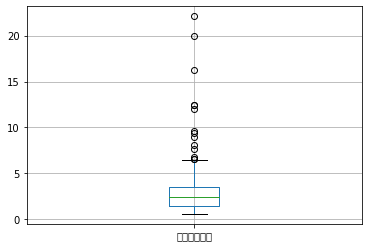

C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0, flags=flags)


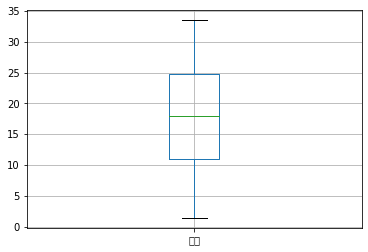

C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0, flags=flags)


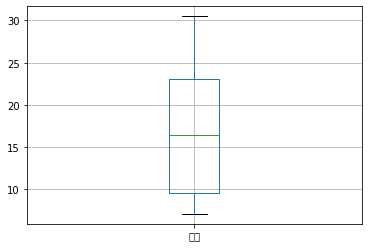

C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36879 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36879 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\meina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24230 missing from curre

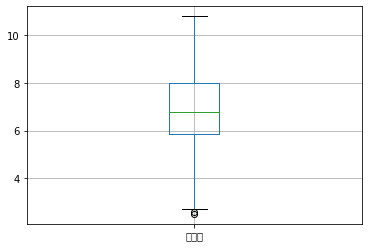

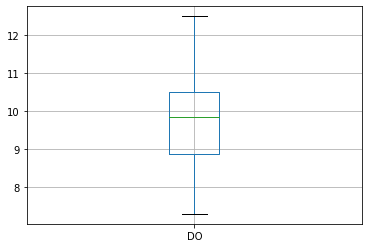

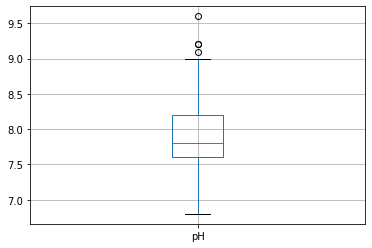

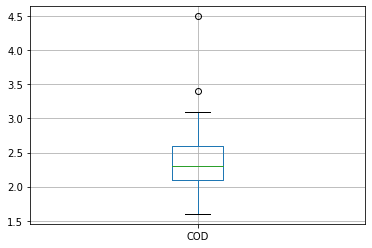

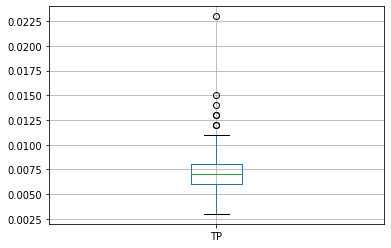

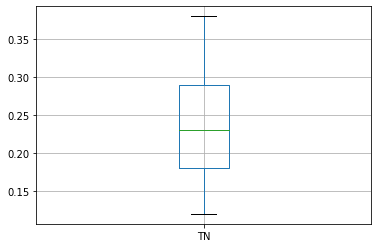

In [6]:
columns = ["クロロフィル","気温","水温","透明度","DO","pH","COD","TP","TN"]
for i in columns:
    chinai_data.boxplot([i])
    plt.show()

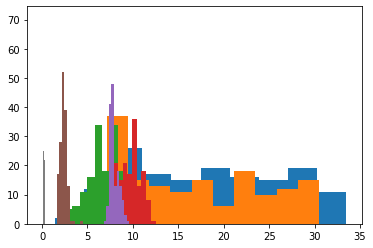

In [7]:
for i in columns:
    plt.hist(chinai_data[i])

(array([ 2., 12., 26., 17., 15., 19., 16., 15., 19., 11.]),
 array([ 1.4 ,  4.61,  7.82, 11.03, 14.24, 17.45, 20.66, 23.87, 27.08,
        30.29, 33.5 ]),
 <a list of 10 Patch objects>)

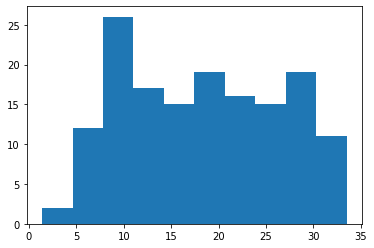

In [8]:
plt.hist(chinai_data['気温'])

(array([17., 28., 52., 39., 13.,  1.,  1.,  0.,  0.,  1.]),
 array([1.6 , 1.89, 2.18, 2.47, 2.76, 3.05, 3.34, 3.63, 3.92, 4.21, 4.5 ]),
 <a list of 10 Patch objects>)

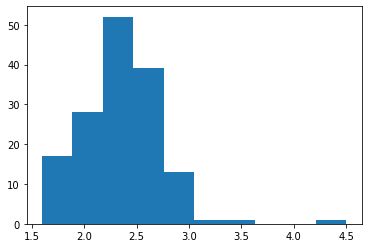

In [9]:
plt.hist(chinai_data['COD'])